# Task2 :Gold_Price_Prediction
 
## Data Science Internship 

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and Libraries

In [7]:
# loading the csv data to a Pandas DataFrame
gold_data =pd.read_csv(r"C:\Users\shivu\Desktop\gold price.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# getting some basic informations about the data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
# checking the number of missing values
gold_data.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:

### 1.Positive Correlation
### 2.Negative Correlation

In [15]:
correlation = gold_data.corr()

<AxesSubplot:>

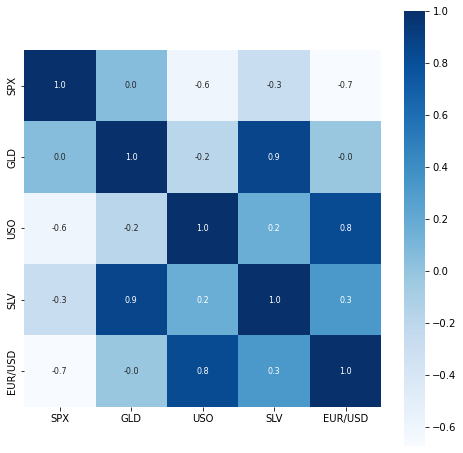

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\shivu\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

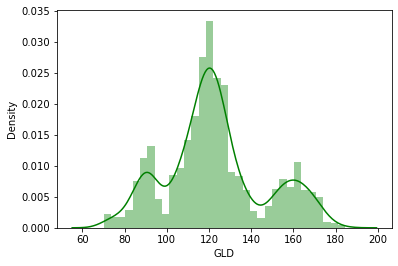

In [19]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [21]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.70769972  82.22819973 115.95880019 127.62320077 120.52310133
 154.75969738 150.1984982  126.1265998  117.5418987  126.04689991
 116.60350095 171.91570113 141.75009828 167.82479836 115.20620011
 117.68240043 138.17920334 170.32600104 159.16090265 159.44220021
 154.98670037 124.9882002  175.84999995 156.81290269 125.23820043
  93.7602997   78.01209987 120.40580006 119.20729989 167.49270017
  88.17250064 125.32979979  91.1923009  117.70850028 120.97149914
 136.21440105 115.61860097 114.87250074 146.46059969 107.12710144
 103.84320257  87.06659786 126.50440059 117.88470018 154.4157988
 119.72129996 108.32390012 108.12569817  93.17680074 127.03819816
  75.06370031 113.69809931 121.17170011 111.3673991  118.91979867
 120.88949923 160.5250005  168.29150133 147.06009707  85.71559825
  94.1747001   86.78599876  90.55520016 118.90430064 126.47390075
 127.70480059 170.42920006 122.21499913 117.260199    98.45440009
 168.21710132 142.78549827 131.90230225 121.15220223 121.8596991
 120.0117005

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892589091415779


In [32]:
Y_test = list(Y_test)

# Compare the Actual Values and Predicted Values in a Plot

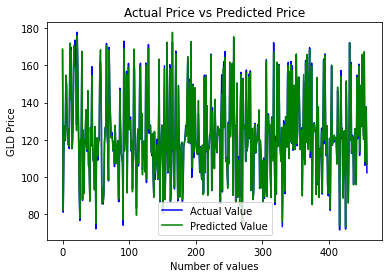

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
